# Comparing between different Sentiment Analysis libraries

Goal: To determine the best available sentiment analysis packages/model library available

Methodology:
Used AI to generate different Sentiments on a dataset of ~2000 entries. (POS, NEU, NEG)
Used Different models to generate a set of Sentiments on the same dataset
Compared using accuracy and visualized, getting the best model

Models Compared: vader, textblob, flair, roberta, distilbert, bertweet, finbert.
*LLM was omitted due to api rate limits and it was also used as the benchmark.


## 1. Setup testing file

In [1]:
import pandas as pd

df = pd.read_csv("data/headlines_with_sentiment.csv")
df.head()

,Index,Headline,Sentiment_label
0,0,Johnson is asking Santa for a Christmas recovery,POS
1,1,‘I now fear the worst’: four grim tales of wor...,NEG
2,2,Five key areas Sunak must tackle to serve up e...,NEU
3,3,Covid-19 leaves firms ‘fatally ill-prepared’ f...,NEG
4,4,The Week in Patriarchy Bacardi's 'lady vodka':...,NEG


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
headline = list(df['Headline'])
len(headline)

## 2. Run the list through different models

In [ ]:
# set up

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if not isinstance(text, str) or text is None:
        return ""
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    test_sentence = " ".join(cleaned_tokens)
    return test_sentence

processed_headline = list(map(preprocess, headline))

In [ ]:
# 1. Prebuilt Vader sentiment package (NaiveBayes model) - Done

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
result_vader = []
threshold_upper = .05
threshold_lower = -.05
analyzer = SentimentIntensityAnalyzer()
for sentence in processed_headline:
    score = analyzer.polarity_scores(sentence)
    result_vader.append(score['compound'])
result_vader = ['POS' if s >= threshold_upper else 'NEG' if s <= threshold_lower else 'NEU' for s in result_vader]
print(result_vader[:10])
print(len(result_vader))
pd.DataFrame(result_vader).to_csv("data/result_vader.csv")

# to determine the threshold

In [ ]:
# 2. Prebuilt Textblob sentiment package - Done

from textblob import TextBlob
result_tb = []
threshold_upper = .05
threshold_lower = -.05
for sentence in processed_headline:
    result_tb.append(TextBlob(sentence).sentiment.polarity)
result_tb = ['POS' if s >= threshold_upper else 'NEG' if s <= threshold_lower else 'NEU' for s in result_tb]
print(result_tb[:10])
print(len(result_tb))
pd.DataFrame(result_tb).to_csv("data/result_tb.csv")

# to determine the threshold

In [ ]:
# 3. Prebuilt Flair sentiment package/Model - Done

from flair.data import Sentence
from flair.nn import Classifier
result_flair = []
tagger = Classifier.load('sentiment')

for sentence in processed_headline:
    sentence = Sentence(sentence)
    tagger.predict(sentence)
    value = sentence.labels[0].value
    result_flair.append(value)
result_flair = ['POS' if s == 'POSITIVE' else 'NEG' if s == 'NEGATIVE' else 'NEU' for s in result_flair]
print(result_flair[:10])
print(len(result_flair))
pd.DataFrame(result_flair).to_csv("data/result_flair.csv")

In [ ]:
# setup for HuggingFace Transformers

from transformers import pipeline, set_seed
set_seed(999)

In [ ]:
# RoBERTa - Done

classifier = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment-latest')

result_roberta = []
for sentence in processed_headline:
    temp = classifier(sentence)
    result_roberta.append(temp[0]['label'])
result_roberta = ['POS' if s == 'positive' else 'NEG' if s == 'negative' else 'NEU' for s in result_roberta]
print(result_roberta[:10])
print(len(result_roberta))
pd.DataFrame(result_roberta).to_csv("data/result_roberta.csv")

In [ ]:
# distilBERT - Done

classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

result_dis = []
for sentence in processed_headline:
    temp = classifier(sentence)
    result_dis.append(temp[0]['label'])
result_dis = ['POS' if s == 'POSITIVE' else 'NEG' if s == 'NEGATIVE' else 'NEU' for s in result_dis]
print(result_dis[:10])
print(len(result_dis))
pd.DataFrame(result_dis).to_csv("data/result_distilbert.csv")

In [ ]:
# Bertweet - Done

classifier = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

result_bertweet = []
for sentence in processed_headline:
    result_bertweet.append(classifier(sentence)[0]['label'])
print(result_bertweet[:10])
print(len(result_bertweet))
pd.DataFrame(result_bertweet).to_csv("data/result_bertweet.csv")

In [ ]:
# finBERT - Done

classifier = pipeline("sentiment-analysis", model="ProsusAI/finbert")

result_finbert = []
for sentence in processed_headline:
    temp = classifier(sentence)
    result_finbert.append(temp[0]['label'])
result_finbert = ['POS' if s == 'positive' else 'NEG' if s == 'negative' else 'NEU' for s in result_finbert]
print(result_finbert[:10])
print(len(result_finbert))
pd.DataFrame(result_finbert).to_csv("data/result_finbert.csv")

In [ ]:
# # LLM QWEN 8gb - Abandoned (ratelimit too low to run for 2000 entries)

# import time
# from openai import OpenAI
#
# client = OpenAI(
#   base_url="https://openrouter.ai/api/v1",
#   api_key="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",
# )
#
# result_ai = []
# DELAY = 1  # Start with 1 second delay, adjust as needed
# for i, sentence in enumerate(processed_headline):
#     try:
#         completion = client.chat.completions.create(
#             extra_body={},
#             model="deepseek/deepseek-r1-0528-qwen3-8b:free",
#             messages=[{
#                 "role": "user",
#                 "content": f"Only give me a sentimental analysis value of NEG (negative), POS (positive), NEU (neutral) for the following sentence {sentence}. Dont add anything else to the output"
#             }]
#         )
#         result_ai.append(completion.choices[0].message.content)
#
#         # Print progress every 10 requests
#         if i % 10 == 0:
#             print(f"Processed {i+1}/{len(processed_headline)} requests")
#
#         # Add delay between requests
#         time.sleep(DELAY)
#
#     except Exception as e:
#         print(f"Error on request {i+1}: {str(e)}")
#         # If rate limited, increase delay and retry
#         DELAY += 1
#         time.sleep(DELAY)
#         continue
#
# print(result_ai[:10])
# print(len(result_ai))
# pd.DataFrame(result_ai).to_csv("data/result_ai.csv")

## Comparing with the benchmark

In [1]:
# visualising the data

import pandas as pd

grok = list(pd.read_csv("data/headlines_with_sentiment.csv")['Sentiment_label'])
vader = list(pd.read_csv("data/result_vader.csv")['0'])
tb = list(pd.read_csv("data/result_tb.csv")['0'])
flair = list(pd.read_csv("data/result_flair.csv")['0'])
roberta = list(pd.read_csv("data/result_roberta.csv")['0'])
distilbert = list(pd.read_csv("data/result_distilbert.csv")['0'])
bertweet = list(pd.read_csv("data/result_bertweet.csv")['0'])
finbert = list(pd.read_csv("data/result_finbert.csv")['0'])

classes = ['POS', 'NEU', 'NEG']

In [2]:
# basic metrics for comparison across the board

from collections import Counter
grok_c = [Counter(grok)[i] for i in classes]
vader_c = [Counter(vader)[i] for i in classes]
tb_c = [Counter(tb)[i] for i in classes]
flair_c = [Counter(flair)[i] for i in classes]
roberta_c = [Counter(roberta)[i] for i in classes]
distilbert_c = [Counter(distilbert)[i] for i in classes]
bertweet_c = [Counter(bertweet)[i] for i in classes]
finbert_c = [Counter(finbert)[i] for i in classes]

C:\Users\Jay Tai\AppData\Local\Temp\ipykernel_10956\3056001337.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\Jay Tai\AppData\Local\Temp\ipykernel_10956\3056001337.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')
C:\Users\Jay Tai\AppData\Local\Temp\ipykernel_10956\3056001337.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45, ha='right')


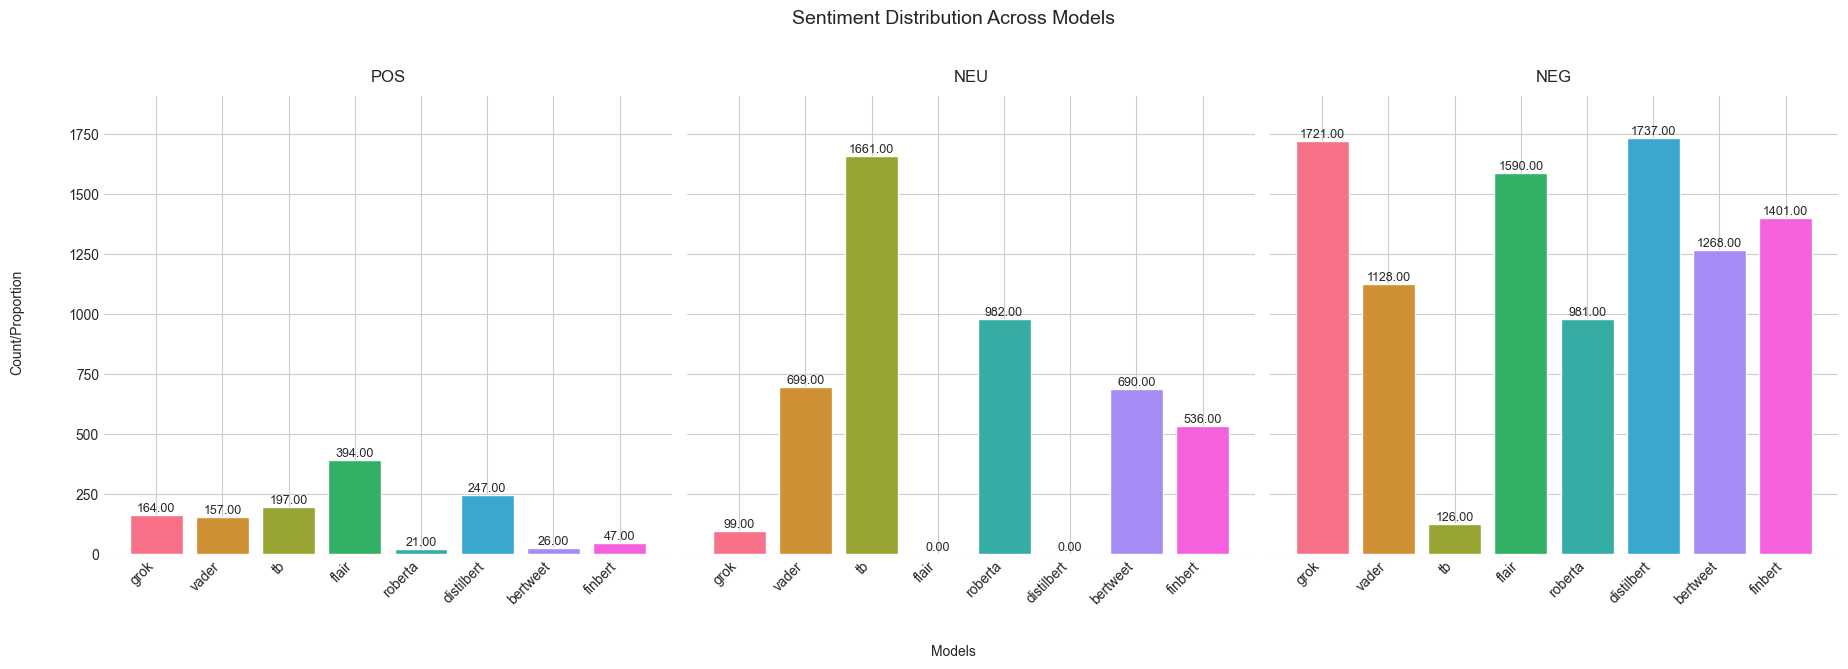

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Data (assuming grok, vader, etc. are lists of counts/proportions for each sentiment)
data = {
    'POS': [grok_c[0], vader_c[0], tb_c[0], flair_c[0], roberta_c[0], distilbert_c[0], bertweet_c[0], finbert_c[0]],
    'NEU': [grok_c[1], vader_c[1], tb_c[1], flair_c[1], roberta_c[1], distilbert_c[1], bertweet_c[1], finbert_c[1]],
    'NEG': [grok_c[2], vader_c[2], tb_c[2], flair_c[2], roberta_c[2], distilbert_c[2], bertweet_c[2], finbert_c[2]]
}

models = ['grok', 'vader', 'tb', 'flair', 'roberta', 'distilbert', 'bertweet', 'finbert']
colors = sns.color_palette("husl", len(models))

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Sentiment Distribution Across Models', y=1.02, fontsize=14)

# Plot each sentiment
for i, sentiment in enumerate(['POS', 'NEU', 'NEG']):
    ax = axes[i]
    bars = ax.bar(models, data[sentiment], color=colors)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

    ax.set_title(sentiment, pad=10)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylim(0, max(max(data['POS']), max(data['NEU']), max(data['NEG'])) * 1.1)

# Add common labels
fig.text(0.5, -0.05, 'Models', ha='center', va='center')
fig.text(-0.02, 0.5, 'Count/Proportion', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

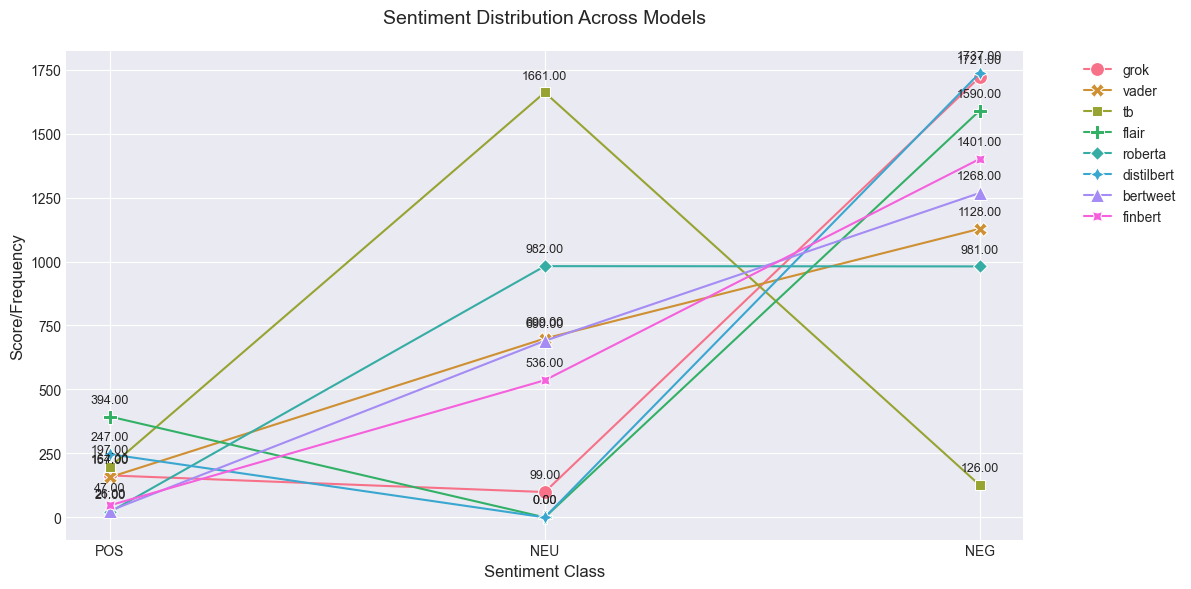

In [37]:
# LINE PLOTS

# SEPARATE
x = ('POS', 'NEU', 'NEG')
y1 = grok_c
y2 = vader_c
y3 = tb_c
y4 = flair_c
y5 = roberta_c
y6 = distilbert_c
y7 = bertweet_c
y8 = finbert_c

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert to long-form DataFrame (Seaborn's preferred format)
data = {
    'Model': ['grok']*3 + ['vader']*3 + ['tb']*3 + ['flair']*3 +
            ['roberta']*3 + ['distilbert']*3 + ['bertweet']*3 + ['finbert']*3,
    'Sentiment': ['POS', 'NEU', 'NEG']*8,
    'Value': np.concatenate([y1, y2, y3, y4, y5, y6, y7, y8])  # Ensure these are numerical!
}

df = pd.DataFrame(data)

# Style settings
plt.style.use('seaborn-v0_8-darkgrid')
palette = sns.color_palette("husl", 8)  # 8 distinct colors
fig, ax = plt.subplots(figsize=(12, 6))

# Create plot
sns.lineplot(
    data=df,
    x='Sentiment',
    y='Value',
    hue='Model',
    style='Model',
    markers=True,
    dashes=False,
    markersize=10,
    palette=palette,
    ax=ax
)

# Enhancements
ax.set_title('Sentiment Distribution Across Models', fontsize=14, pad=20)
ax.set_xlabel('Sentiment Class', fontsize=12)
ax.set_ylabel('Score/Frequency', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside

# Add value annotations
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.annotate(
            f'{y:.2f}',
            (x, y),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontsize=9
        )

plt.tight_layout()
plt.show()

# most closely observe the distribution is Flair and Distilbert

In [6]:
from sklearn.metrics import accuracy_score
classes = ['POS', 'NEU', 'NEG']
print(f"vader accuracy: {accuracy_score(grok, vader)}")
print(f"tb accuracy: {accuracy_score(grok, tb)} (Worse Accuracy)")
print(f"flair accuracy: {accuracy_score(grok, flair)} (Second Best Accuracy)")
print(f"roberta accuracy: {accuracy_score(grok, roberta)}")
print(f"distilbert accuracy: {accuracy_score(grok, distilbert)} (Best Accuracy)")
print(f"bertweet accuracy: {accuracy_score(grok, bertweet)}")
print(f"finbert accuracy: {accuracy_score(grok, finbert)}")

vader accuracy: 0.609375
tb accuracy: 0.09727822580645161 (Worse Accuracy)
flair accuracy: 0.7772177419354839 (Second Best Accuracy)
roberta accuracy: 0.5413306451612904
distilbert accuracy: 0.8256048387096774 (Best Accuracy)
bertweet accuracy: 0.6814516129032258
finbert accuracy: 0.7358870967741935


In [39]:
# textblob - lowest accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classes = ['POS', 'NEU', 'NEG']
print(confusion_matrix(grok, tb, labels=classes))
print(classification_report(grok, tb, labels=classes))
print(accuracy_score(grok, tb))

[[  38  101   25]
 [  19   67   13]
 [ 140 1493   88]]
              precision    recall  f1-score   support

         POS       0.19      0.23      0.21       164
         NEU       0.04      0.68      0.08        99
         NEG       0.70      0.05      0.10      1721

    accuracy                           0.10      1984
   macro avg       0.31      0.32      0.13      1984
weighted avg       0.62      0.10      0.10      1984

0.09727822580645161


In [8]:
# distilbert - highest accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classes = ['POS', 'NEU', 'NEG']
print("Distilbert")
print(confusion_matrix(grok, distilbert, labels=classes))
print(classification_report(grok, distilbert, labels=classes))
print(accuracy_score(grok, distilbert))

Distilbert
[[  65    0   99]
 [  34    0   65]
 [ 148    0 1573]]
              precision    recall  f1-score   support

         POS       0.26      0.40      0.32       164
         NEU       0.00      0.00      0.00        99
         NEG       0.91      0.91      0.91      1721

    accuracy                           0.83      1984
   macro avg       0.39      0.44      0.41      1984
weighted avg       0.81      0.83      0.82      1984

0.8256048387096774


C:\Users\Jay Tai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jay Tai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jay Tai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics

In [9]:
# flair - second best accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classes = ['POS', 'NEU', 'NEG']
print("Flair")
print(confusion_matrix(grok, flair, labels=classes))
print(classification_report(grok, flair, labels=classes))
print(accuracy_score(grok, flair))

Flair
[[  86    0   78]
 [  43    0   56]
 [ 265    0 1456]]
              precision    recall  f1-score   support

         POS       0.22      0.52      0.31       164
         NEU       0.00      0.00      0.00        99
         NEG       0.92      0.85      0.88      1721

    accuracy                           0.78      1984
   macro avg       0.38      0.46      0.40      1984
weighted avg       0.81      0.78      0.79      1984

0.7772177419354839


C:\Users\Jay Tai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jay Tai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Jay Tai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics